<a href="https://colab.research.google.com/github/ziad-mohamed-7/MIA_Tasks/blob/main/TASK1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK1.1- The Unsinkable Predictor**

## **1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## **2. Loading and Inspecting Data**

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **3. Data Cleaning and Preprocessing**

* **Handling Missing Values:**




In [ ]:
# Fill missing values for 'Age' with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing 'Fare' in the test set
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

* **Feature Encoding:**

In [ ]:
# Convert categorical 'Sex' and 'Embarked' into numeric form using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)


* **Feature Selection:**


In [ ]:
# Select features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = train_data[features]
y = train_data['Survived']

# Prepare the test set
X_test = test_data[features]


* **Train-Test Split:**

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# **4. Model Training**

* **Logistic Regression:**

In [ ]:
# Initialize and train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions on validation set
y_pred_log_reg = log_reg.predict(X_val)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* **Decision Tree Classifier:**

In [ ]:
# Initialize and train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions on validation set
y_pred_tree = decision_tree.predict(X_val)


# **5. Model Evaluation**

**Evaluation Metrics:**


In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

# Evaluate Logistic Regression
evaluate_model(y_val, y_pred_log_reg, "Logistic Regression")

# Evaluate Decision Tree
evaluate_model(y_val, y_pred_tree, "Decision Tree")


Performance for Logistic Regression:
Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
F1 Score: 0.75
[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Performance for Decision Tree:
Accuracy: 0.7821229050279329
Precision: 0.7272727272727273
F1 Score: 0.7417218543046358
[[84 21]
 [18 56]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



# **6. Prediction on Test Data and Export CSV**

* **Logistic Regression Predictions:**

In [ ]:
# Predicting 'Survived' status for test set using Logistic Regression
y_test_pred = log_reg.predict(X_test)

# Creating a DataFrame for submission
submission_log_reg = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_test_pred
})

# Save to CSV
submission_log_reg.to_csv('logistic_regression_submission.csv', index=False)


* **Decision Tree Predictions:**

In [ ]:
# Predicting 'Survived' status for test set using Decision Tree
y_test_pred_tree = decision_tree.predict(X_test)

# Creating a DataFrame for submission
submission_tree = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_test_pred_tree
})

# Save to CSV
submission_tree.to_csv('decision_tree_submission.csv', index=False)


# **7. Exploratory Data Analysis (EDA)**

* **Visualizing Survival Rates by Gender:**

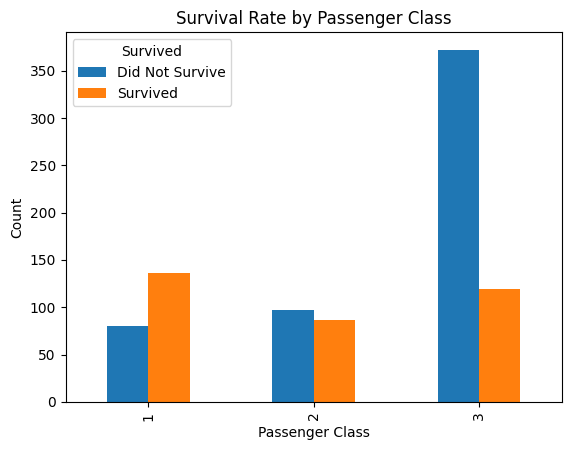

In [ ]:
# Count the number of survivors and non-survivors by passenger class
survived_by_pclass = train_data.groupby('Pclass')['Survived'].value_counts().unstack()

# Bar plot for survival rate by class
survived_by_pclass.plot(kind='bar', stacked=False)

plt.title('Survival Rate by Passenger Class')
plt.ylabel('Count')
plt.xlabel('Passenger Class')
plt.legend(['Did Not Survive', 'Survived'], title='Survived')
plt.show()


* **Distribution of Age:**

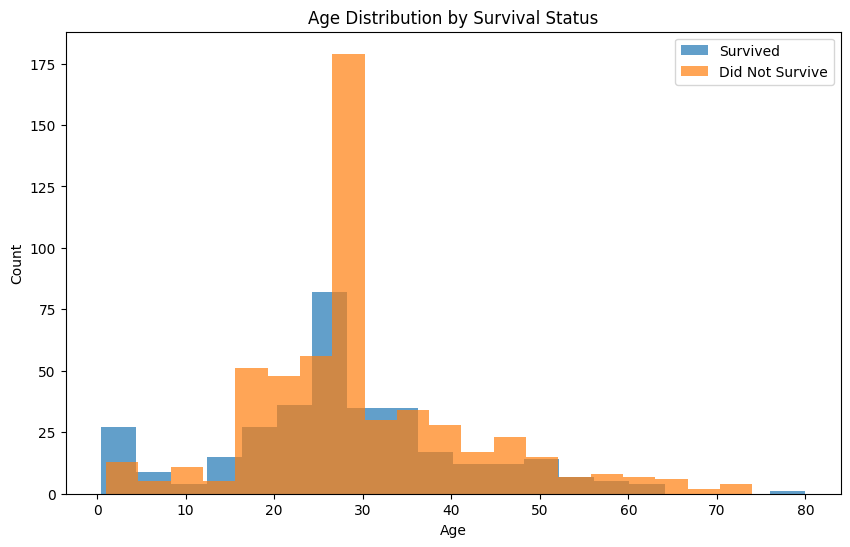

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(train_data[train_data['Survived'] == 1]['Age'], bins=20, alpha=0.7, label='Survived')
plt.hist(train_data[train_data['Survived'] == 0]['Age'], bins=20, alpha=0.7, label='Did Not Survive')

# Customize the plot
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

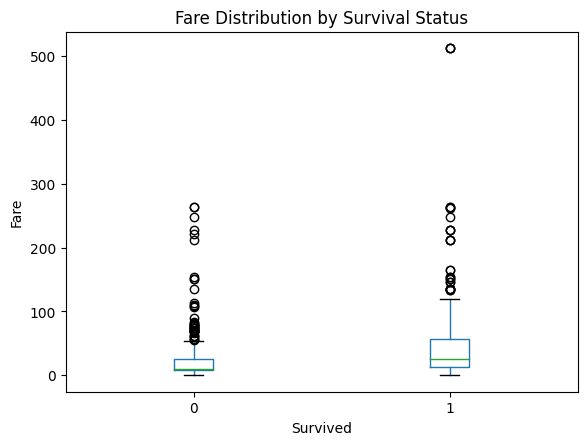

In [ ]:
# Box plot to show fare distribution by survival status
plt.figure(figsize=(10,6))
train_data.boxplot(column='Fare', by='Survived', grid=False)

plt.title('Fare Distribution by Survival Status')
plt.suptitle('')  # Removes the automatic title generated by Pandas
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


In [ ]:
# Count of survivors and non-survivors by embarkation point
survived_by_embarked = train_data.groupby('Embarked')['Survived'].value_counts().unstack()

# Bar plot for survival rate by embarkation point
survived_by_embarked.plot(kind='bar', stacked=False)

plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Count')
plt.xlabel('Embarked Location')
plt.legend(['Did Not Survive', 'Survived'], title='Survived')
plt.show()


KeyError: 'Embarked'